### Edgar Moises Hernandez-Gonzalez
#### 25/07/20
#### Espectrograma con STFT de EEG de BCI-II-III

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [2]:
#la muestra 2 es mano derecha para el train del sujeto 1
# canal C3 (canal 1)
# canal C4 (canal 3) (usar este)
canal = pd.read_csv("MIEEG_train.csv", header=None).iloc[1, 768:1536]

In [3]:
canal.shape

(768,)

(768,)


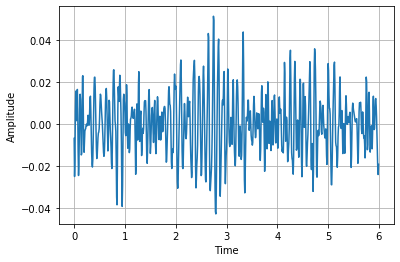

In [4]:
# 6 segundos con fs=128Hz
fs = 128
time = np.arange(0, 6, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [12]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs=128, window='hann', nperseg=128, noverlap=112, nfft=256, scaling='spectrum')

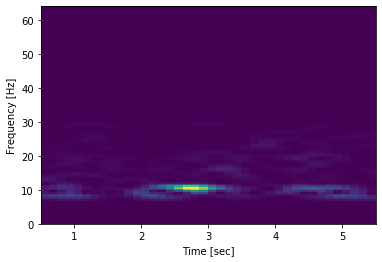

In [13]:
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [14]:
print(f[16])
print(f[60])

8.0
30.0


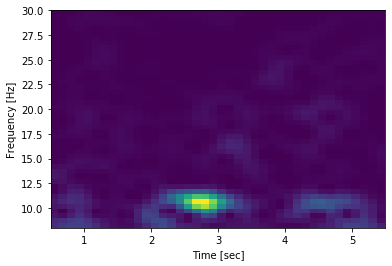

In [16]:
# Espectrograma con spectrogram, STFFT (Zoom)
plt.pcolormesh(t, f, Sxx)
plt.axis([t[0], t[-1:], f[16], f[60]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [17]:
print("Shape Espectrograma:", Sxx.shape)
print("Valores de f:\n", f[16:61])

Shape Espectrograma: (129, 41)
Valores de f:
 [ 8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30. ]


STFFT
(45, 41)


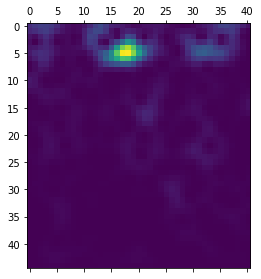

In [18]:
print("STFFT")
x = Sxx[16:61, :]
print(x.shape)
plt.matshow(x)
plt.show()